# ITSLIVE Glacier Velocities

In [1]:
import itslive
itslive.__version__

'0.1.2'

In [5]:
point = (-46.0, 70.1)
# cubes = itslive.cubes.find_by_bbox(-48.0,60.0,-45.1,70.0)
# cubes = itslive.cubes.find_by_polygon()

cubes = itslive.cubes.find([point])
cubes

[{'type': 'Feature',
  'geometry': {'type': 'Polygon',
   'coordinates': [[[-47.602562, 69.871451],
     [-45.0, 69.891805],
     [-45.0, 70.789059],
     [-47.726311, 70.767681],
     [-47.602562, 69.871451]]]},
  'properties': {'fill-opacity': -0.0012004801920768582,
   'fill': 'red',
   'roi_percent_coverage': 100.12004801920769,
   'geometry_epsg': {'type': 'Polygon',
    'coordinates': [[[-100000, -2200000],
      [0, -2200000],
      [0, -2100000],
      [-100000, -2100000],
      [-100000, -2200000]]]},
   'datacube_exist': 1,
   'zarr_url': 'http://its-live-data.s3.amazonaws.com/datacubes/v02/N70W040/ITS_LIVE_vel_EPSG3413_G0120_X-50000_Y-2150000.zarr',
   'epsg': 3413}}]

In [6]:
points=[(-47.1, 70.1),
        (-46.1, 71.2)]

velocities = itslive.cubes.get_time_series(points=points, variables=["v","vx", "vy"])

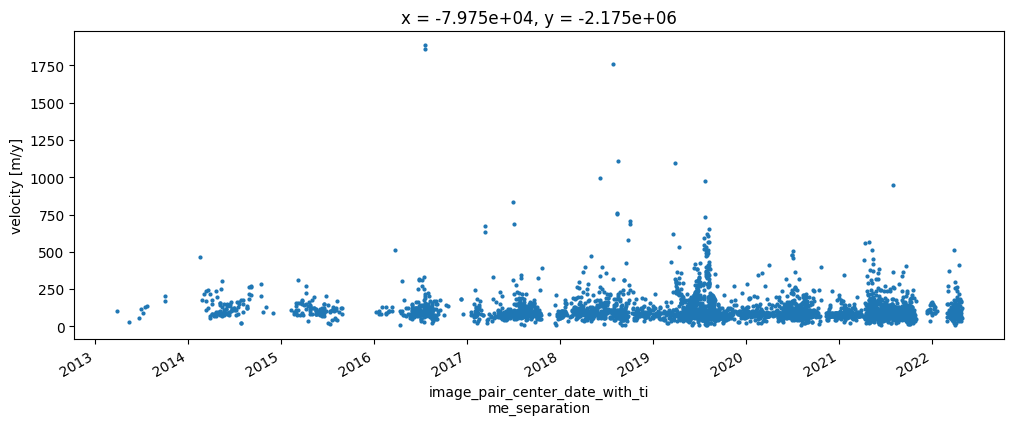

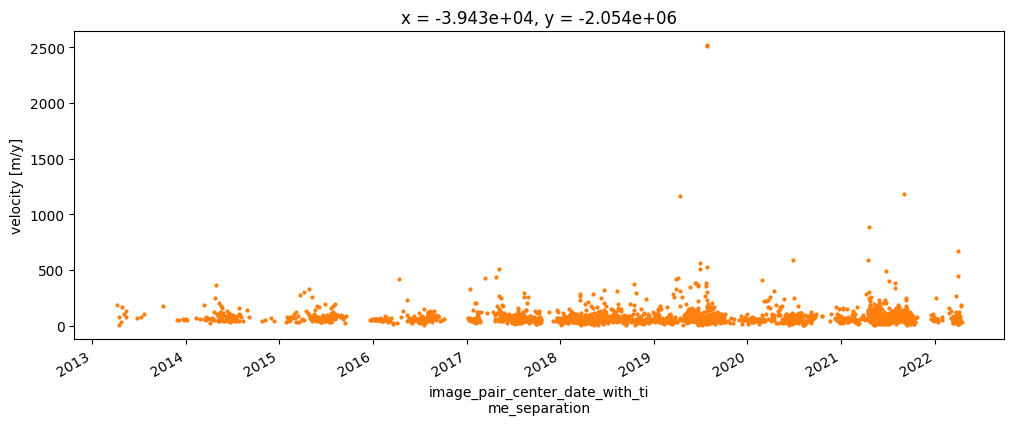

In [7]:
import matplotlib as mpl
from matplotlib import pyplot as plt

color_index = 0
for vel in velocities:
    latitude = vel["coordinates"][1]
    longitude = vel["coordinates"][0]
    point_label = f"Lon: {longitude}, Lat: {latitude}"
    ax = vel["time_series"].v.plot(linestyle="None", marker="o", markersize=2, figsize=(12,4), c=plt.cm.tab10(color_index), label=point_label)
    color_index+=1